<a href="https://colab.research.google.com/github/zuulaika/Projet-python/blob/main/Taux_moyen_criminalite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taux Moyen de Criminalité 2019 vs 2024

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [3]:
!pip install pandas fiona shapely pyproj rtree geopandas

In [4]:
import pandas as pd
import geopandas as gpd

In [5]:
!pip install cartiflette
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 4.3 MB/s eta 0:00:00


Reprojeter les données en Lambert 93 (EPSG: 2154) (Le Lambert 93 a été conçu pour être le moins déformant possible sur la France métropolitaine).

In [6]:
departements_lambert93 = departements.to_crs(epsg=2154)


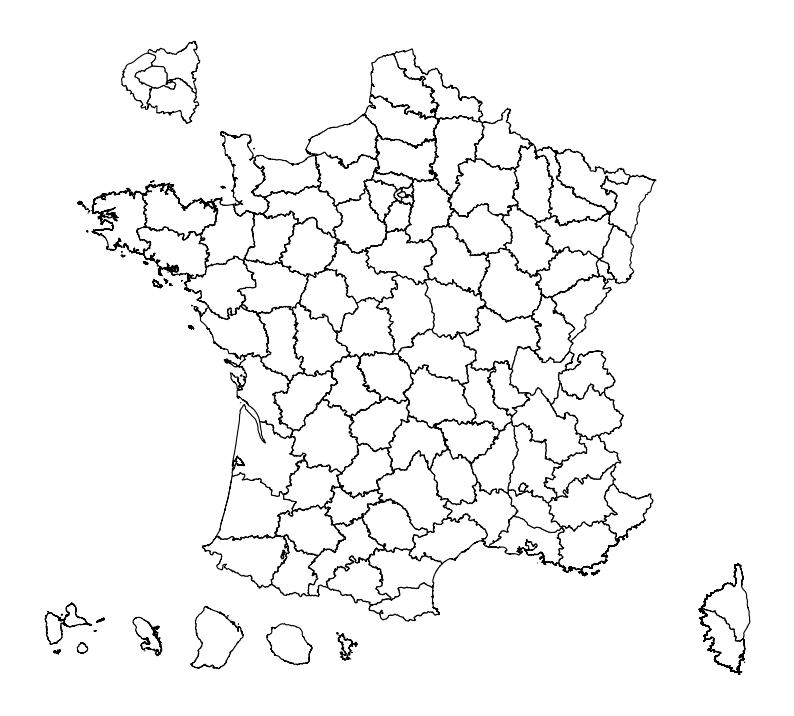

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
departements_lambert93.plot(ax=ax, color='white', edgecolor='black', linewidth=0.8)
ax.set_axis_off()

In [8]:
#Préparer les données de criminalité pour le calcul de la moyenne
url = "https://www.data.gouv.fr/fr/datasets/r/8debb975-02da-4bfc-808f-42d18ad76d0b"
df = pd.read_csv(url, sep=';', dtype=str)

df['Code_departement'] = df['Code_departement'].astype(str)
df['taux_pour_mille'] = df['taux_pour_mille'].str.replace(',', '.', regex=False).astype(float)

df_avg_criminalite = df.groupby(['Code_departement', 'annee'])['taux_pour_mille'].mean().reset_index()
df_avg_criminalite = df_avg_criminalite.rename(columns={'taux_pour_mille': 'average_taux_pour_mille'})

print("First few rows of df_avg_criminalite:")
print(df_avg_criminalite.head())
print("\nInfo of df_avg_criminalite:")
print(df_avg_criminalite.info())

First few rows of df_avg_criminalite:
  Code_departement annee  average_taux_pour_mille
0               01  2016                 1.993795
1               01  2017                 2.006328
2               01  2018                 2.046621
3               01  2019                 2.137425
4               01  2020                 1.830359

Info of df_avg_criminalite:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code_departement         909 non-null    object 
 1   annee                    909 non-null    object 
 2   average_taux_pour_mille  909 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.4+ KB
None


In [9]:
#Filtrer les données pour 2019 et 2024
#Extraire la criminnalité moyenne pour 2019 et 2024 a partir de df_avg_criminalite DataFrame.
df_avg_criminalite_2019 = df_avg_criminalite[df_avg_criminalite['annee'] == '2019']
df_avg_criminalite_2024 = df_avg_criminalite[df_avg_criminalite['annee'] == '2024']

print("First few rows of df_avg_criminalite_2019:")
print(df_avg_criminalite_2019.head())
print("\nInfo of df_avg_criminalite_2019:")
print(df_avg_criminalite_2019.info())

print("\nFirst few rows of df_avg_criminalite_2024:")
print(df_avg_criminalite_2024.head())
print("\nInfo of df_avg_criminalite_2024:")
print(df_avg_criminalite_2024.info())

First few rows of df_avg_criminalite_2019:
   Code_departement annee  average_taux_pour_mille
3                01  2019                 2.137425
12               02  2019                 2.530551
21               03  2019                 2.097978
30               04  2019                 2.556820
39               05  2019                 2.117878

Info of df_avg_criminalite_2019:
<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 3 to 903
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Code_departement         101 non-null    object 
 1   annee                    101 non-null    object 
 2   average_taux_pour_mille  101 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.2+ KB
None

First few rows of df_avg_criminalite_2024:
   Code_departement annee  average_taux_pour_mille
8                01  2024                 2.471379
17               02  2024                 2.9

In [10]:
#Maintenant que les données sur la criminalité moyenne pour 2019 et 2024 ont été extraites, l’étape suivante consiste à fusionner ces données
#avec les données géographiques (departements_lambert93) afin de préparer la création de cartes choroplèthes.
merged_avg_criminalite_2019 = departements_lambert93.merge(df_avg_criminalite_2019, left_on='INSEE_DEP', right_on='Code_departement', how='left')
merged_avg_criminalite_2024 = departements_lambert93.merge(df_avg_criminalite_2024, left_on='INSEE_DEP', right_on='Code_departement', how='left')

print("First few rows of merged_avg_criminalite_2019:")
print(merged_avg_criminalite_2019.head())
print("\nInfo of merged_avg_criminalite_2019:")
print(merged_avg_criminalite_2019.info())

print("\nFirst few rows of merged_avg_criminalite_2024:")
print(merged_avg_criminalite_2024.head())
print("\nInfo of merged_avg_criminalite_2024:")
print(merged_avg_criminalite_2024.info())

First few rows of merged_avg_criminalite_2019:
  INSEE_DEP    PAYS LIBELLE_DEPARTEMENT  POPULATION  \
0        43  France         Haute-Loire      227570   
1        65  France     Hautes-Pyrénées      229567   
2        29  France           Finistère      915090   
3        22  France       Côtes-d'Armor      600582   
4        38  France               Isère     1271166   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry Code_departement annee  \
0  POLYGON ((770266.6 6473465.6, 770255.9 6473419...               43  2019   
1  MULTIPOLYGON (((449840.3 6280811.2, 449889.1 6...               65  2019   
2  MULTIPOLYGON (((177277.8 6756845.8, 177266.5 6...               29  2019   
3  MULTIPOLYGON (((245287.3 6878865.1, 245276.3 6...               22  

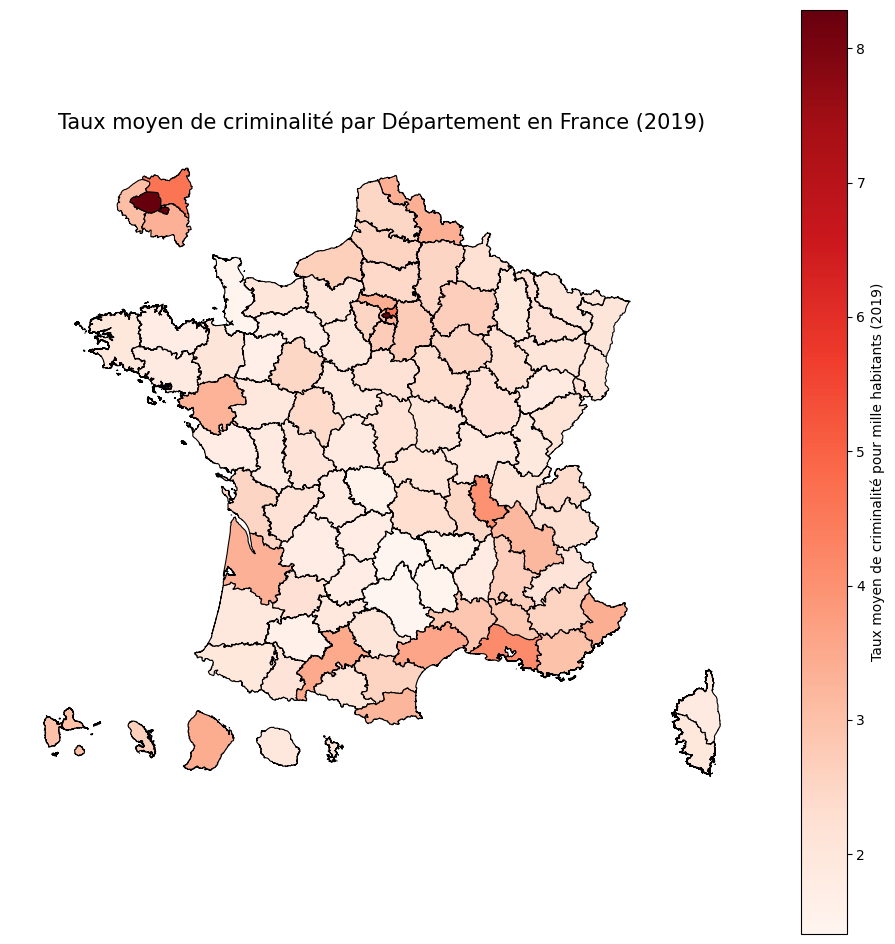

In [11]:
import matplotlib.pyplot as plt

# Utiliser merged_avg_criminalite_2019
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_avg_criminalite_2019.plot(
    column='average_taux_pour_mille',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Taux moyen de criminalité pour mille habitants (2019)", 'orientation': "vertical"}
)
ax.set_title("Taux moyen de criminalité par Département en France (2019)", fontsize=15)
ax.set_axis_off()
plt.show()

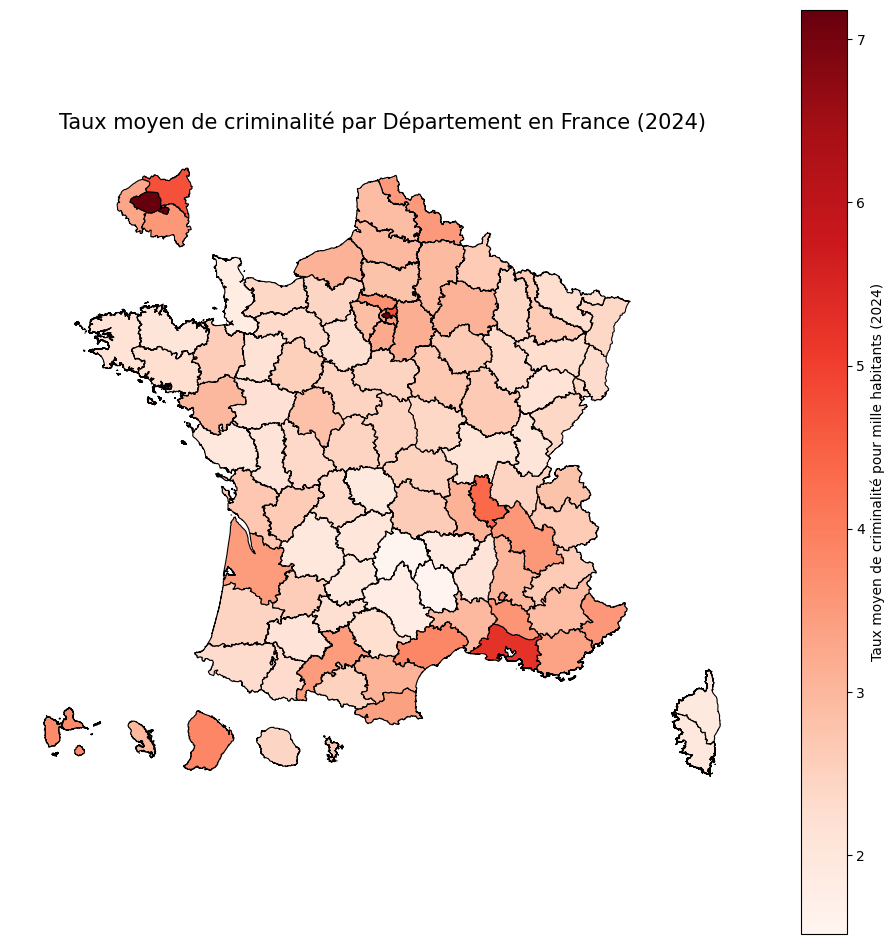

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# Utiliser merged_avg_criminalite_2024 sans filtrer la métropole
merged_avg_criminalite_2024.plot(
    column='average_taux_pour_mille',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Taux moyen de criminalité pour mille habitants (2024)", 'orientation': "vertical"}
)
ax.set_title("Taux moyen de criminalité par Département en France (2024)", fontsize=15)
ax.set_axis_off()
plt.show()